Figure S3A-D (4 subfigures) from Mahdavi & Siegel (2021) Indoor Air (IA)

This figure illustrates the PSD of 6 fraction of samples collected from 6 different locations of a filter (for four filters tested). The figure is presented in the Supplemental Information (SI).

Plot type: Line plot

In [1]:
import sys
sys.modules[__name__].__dict__.clear()
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
exec(open(r'C:\Generic Codes\notion_corrections.py').read())
exec(open(r'C:\Generic Codes\mastersizer_all.py').read())

In [2]:
###############################################
### Step 1: Refining four targetted samples ###
###############################################

path_import = backslash_correct(r'C:\PhD Research\PhD - PSD TSP\Raw')
path_export = backslash_correct(r'C:\PhD Research\Processed\psd')

i = 1
for file in ['033.csv', '041.csv', '046.csv', '049.csv']:
    export_file = file[:-4] + '_ordered'
    temp = mastersizer_input_v2(path_import, path_export, file, export_file)        
    
    if i == 1:
        df = temp
        i += 1
    else:
        df = pd.merge(df, temp, on = "Size", how = 'outer')

list_all = list(df.columns)
list_all_mean = [col for col in list_all if (col[-4:] == 'mean') & (col[9:10] == 'D')]

size = df['Size']

mother_list = ['Down1_F1', 'Down1_F2', 'Down2_F1', 'Mid1_F1', 'Mid2_F1', 'Up1_F1', 'Up2_F1']


In [3]:
######################################################
### Step 2: Refining data for figure visualization ###
######################################################

for item in ['033', '041', '046', '049']:
    if item != '049':
        keep_col = [col for col in df.columns if (('mean' in col)|('min' in col)|('max' in col))
                                                & ((('Down1_F1' in col)|('Down1_F2' in col)|('Down2_F1' in col))
                                                | (('Mid1_F1' in col)|('Mid2_F1' in col))
                                                | (('Up1_F1' in col)|('Up2_F1' in col)))
                                                & ('_S_' not in col)
                                                & (item in col)]

    else: 
        keep_col = [col for col in df.columns if (('mean' in col)|('min' in col)|('max' in col))
                                                & ((('Down1_F1' in col)|('Down1_F2' in col)|('Down2_F1' in col))
                                                | (('Mid1_F1' in col)|('Mid2_F1' in col)|('MID2_F1' in col))
                                                | (('Up1_F1' in col)|('Up2_F1' in col)))
                                                & ('_S_' not in col)
                                                & (item in col)]
        
    df_sub = df[keep_col]
    keep_col_new = [col[5:8] + '_' + col[24:] for col in keep_col]
    
    df_sub.rename(columns = dict(zip(keep_col,keep_col_new)), inplace = True)
    
    # test = list(df.columns)
    new_list = []
    
    for stat in ['mean', 'min', 'max']:
        j = 0
        while j < len(mother_list):
            if j == 0:
                new_list = [item + '_' + mother_list[j] + '_' + stat]
                
            else:
                new_list.append(item + '_' + mother_list[j] + '_' + stat)
            j += 1
               
        
        if item == '046': # Exception handling for '046'
            vars()['df_%s_%s' %(item,stat)] = df_sub[new_list]
            # vars()['df_%s_%s' %(item,stat)] = vars()['df_%s_%s' %(item,stat)].iloc[:,:-1]
            vars()['df_%s_%s' %(item,stat)] = pd.concat([vars()['df_%s_%s' %(item,stat)].iloc[:,0:6],vars()['df_%s_%s' %(item,stat)].iloc[:,-1]], axis = 1)
        
        elif item == '049': # Exception handling for '046'
            
            orig_list = [col for col in df_sub.columns if 'MID' in col]
            modified_list = [col.replace('MID', 'Mid') for col in df_sub.columns if 'MID' in col]
            df_sub.rename(columns = dict(zip(orig_list,modified_list)) , inplace =True)
             
            vars()['df_%s_%s' %(item,stat)] = df_sub[new_list]
            
        else: 
            vars()['df_%s_%s' %(item,stat)] = df_sub[new_list]
    

color_code = {0: 'k',
              1: 'k',
              2: 'darkgray',
              3: 'b',
              4: 'deepskyblue',
              5: 'r',
              6: 'lightcoral'}

filt_dict = {'033' : '8E', 
             '041': '8', 
             '046': '14', 
             '049': '11'}

label_list = ['Down 1st (F1)', 'Down 1st (F2)', 'Down 2nd', 'Mid 1st', 'Mid 2nd', 'Up 1st', 'Up 2nd']


C:\Users\alima\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


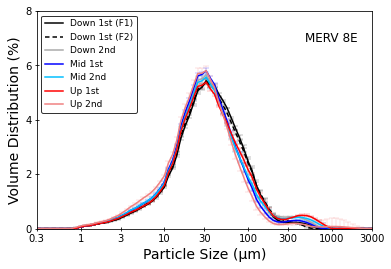

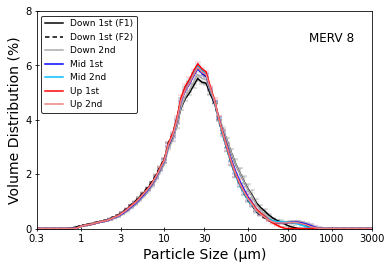

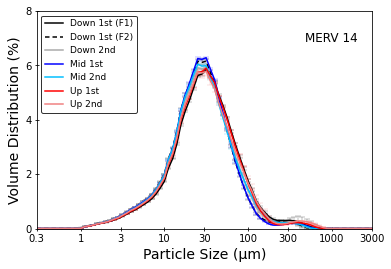

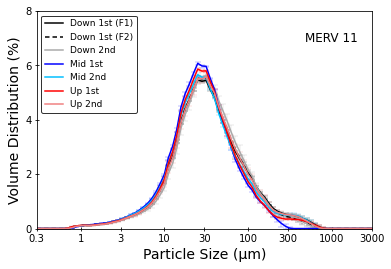

In [4]:
####################################
### Step 3: Figure visualization ###
####################################

for item in ['033', '041', '046', '049']:
    plt.figure()
    i = 0 
    while i < 7:
        y = vars()['df_%s_mean' %item].iloc[:,i]
        y_neg_err = vars()['df_%s_min' %item].iloc[:,i]
        y_pos_err = vars()['df_%s_max' %item].iloc[:,i]
        if i == 1:
            plt.errorbar(size, y, yerr = [y_neg_err,y_pos_err], xerr = None, 
                         capsize = 3, c = color_code[i], ecolor = color_code[i], 
                         ls = (0,(3,2)), elinewidth = 0.25, capthick = 0.25, label = label_list[i])
        else:
            plt.errorbar(size, y, yerr = [y_neg_err,y_pos_err], xerr = None, 
                         capsize = 3, c = color_code[i], ecolor = color_code[i], elinewidth = 0.25, capthick = 0.25, label = label_list[i])
        i += 1
    
    plt.xscale('log')
       
    a = [0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
    plt.xlim(0.3, 3000)
    plt.xticks(ticks = a, labels = a)
    plt.minorticks_off()
    plt.xlabel('Particle Size (µm)', size = 14)

    plt.ylim(0, 8)
    plt.yticks(np.arange(0, 9, step=2))
    plt.ylabel('Volume Distribution (%)', size = 14)

    plt.tick_params(axis = 'both', direction = 'inout')
    
    
    ## The below system doesn't work in loop as it cumulatvely add labels. Should later find a solution for it.
    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    new_handles = []
    for h in handles:
        #only need to edit the errorbar legend entries
        if isinstance(h, container.ErrorbarContainer):
            new_handles.append(h[0])
        else:
            new_handles.append(h)
    ax.legend(new_handles, labels, loc = 2, frameon = True, edgecolor = 'black', fontsize = 9)
    
    
    # plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
    plt.text(1000, 7, 'MERV ' + filt_dict[item], ha = 'center', va = 'center', fontsize = 12)
    
    plt.savefig(r'Figure_s3_' + item + '.jpg', format='jpg', dpi=1600, bbox_inches='tight')

End of Code